In [117]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from keras import initializers

os.environ["KERAS_BACKEND"] = "tensorflow"
np.random.seed(10)
random_dim = 100

In [118]:
def load_minst_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)

In [119]:
def get_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

In [120]:
def get_generator(optimizer):
    generator = Sequential()
    generator.add(Dense(256, input_dim=random_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(1024))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(784, activation='tanh'))
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator

In [121]:
def get_discriminator(optimizer):
    discriminator = Sequential()
    discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator


In [122]:
def get_gan_network(discriminator, random_dim, generator, optimizer):
    discriminator.trainable = False
    gan_input = Input(shape=(random_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    return gan

In [123]:
def plot_generated_images(epoch, generator, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, random_dim])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image_epoch_%d.png' % epoch)

In [124]:
def train(epochs=1, batch_size=128):
    x_train, y_train, x_test, y_test = load_minst_data()
    batch_count = x_train.shape[0] // batch_size
    adam = get_optimizer()
    generator = get_generator(adam)
    discriminator = get_discriminator(adam)
    gan = get_gan_network(discriminator, random_dim, generator, adam)
    print(batch_count)
    for e in range(1, epochs+1):
        print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in tqdm(range(batch_count)):
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            image_batch = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
            generated_images = generator.predict(noise)
            X = np.concatenate([image_batch, generated_images])
            y_dis = np.zeros(2*batch_size)
            y_dis[:batch_size] = 0.9
            discriminator.trainable = True
            discriminator.train_on_batch(X, y_dis)
            noise = np.random.normal(0, 1, size=[batch_size, random_dim])
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)

        if e == 1 or e % 5 == 0:
            print(f'Epoch {e}')
            plot_generated_images(e, generator)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


468
--------------- Epoch 1 ---------------


100%|██████████| 468/468 [01:30<00:00,  5.17it/s]


Epoch 1
--------------- Epoch 2 ---------------


100%|██████████| 468/468 [01:25<00:00,  5.50it/s]


--------------- Epoch 3 ---------------


100%|██████████| 468/468 [01:21<00:00,  5.72it/s]


--------------- Epoch 4 ---------------


100%|██████████| 468/468 [01:22<00:00,  5.68it/s]


--------------- Epoch 5 ---------------


100%|██████████| 468/468 [01:22<00:00,  5.71it/s]


Epoch 5
--------------- Epoch 6 ---------------


100%|██████████| 468/468 [01:22<00:00,  5.67it/s]


--------------- Epoch 7 ---------------


100%|██████████| 468/468 [01:22<00:00,  5.68it/s]


--------------- Epoch 8 ---------------


100%|██████████| 468/468 [01:22<00:00,  5.71it/s]


--------------- Epoch 9 ---------------


100%|██████████| 468/468 [01:23<00:00,  5.62it/s]


--------------- Epoch 10 ---------------


100%|██████████| 468/468 [01:22<00:00,  5.67it/s]


Epoch 10
--------------- Epoch 11 ---------------


100%|██████████| 468/468 [01:22<00:00,  5.67it/s]


--------------- Epoch 12 ---------------


100%|██████████| 468/468 [01:22<00:00,  5.71it/s]


--------------- Epoch 13 ---------------


100%|██████████| 468/468 [01:22<00:00,  5.64it/s]


--------------- Epoch 14 ---------------


100%|██████████| 468/468 [01:22<00:00,  5.65it/s]


--------------- Epoch 15 ---------------


100%|██████████| 468/468 [01:22<00:00,  5.68it/s]


Epoch 15
--------------- Epoch 16 ---------------


100%|██████████| 468/468 [01:23<00:00,  5.63it/s]


--------------- Epoch 17 ---------------


100%|██████████| 468/468 [01:23<00:00,  5.59it/s]


--------------- Epoch 18 ---------------


100%|██████████| 468/468 [01:22<00:00,  5.65it/s]


--------------- Epoch 19 ---------------


100%|██████████| 468/468 [01:22<00:00,  5.66it/s]


--------------- Epoch 20 ---------------


100%|██████████| 468/468 [01:22<00:00,  5.68it/s]


Epoch 20


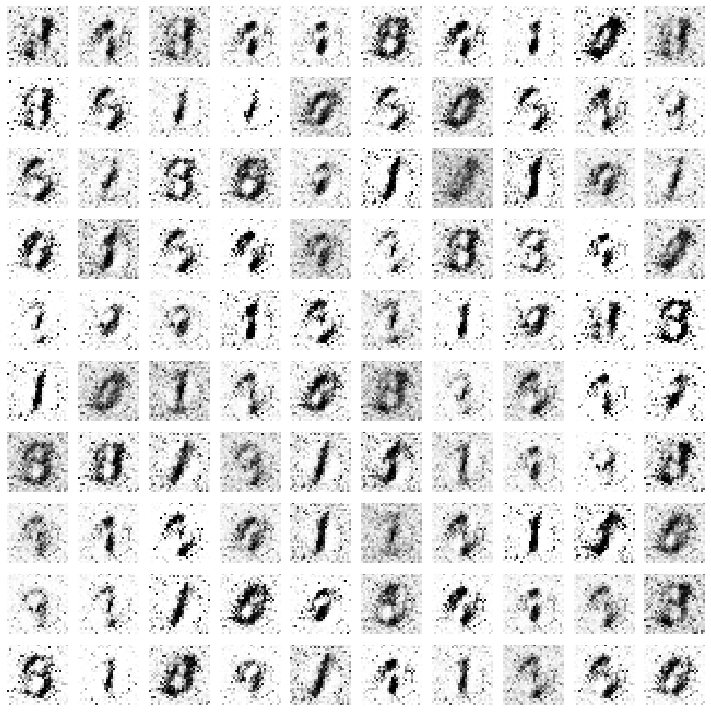

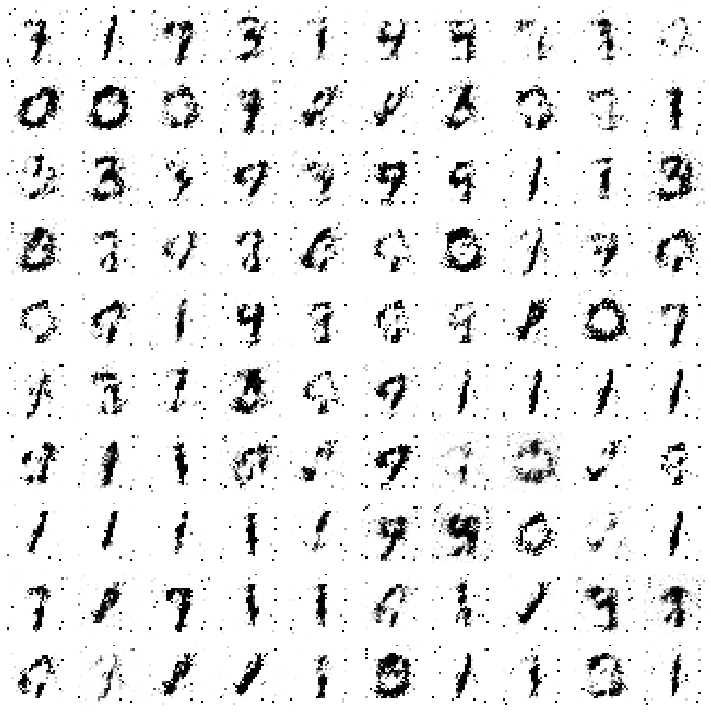

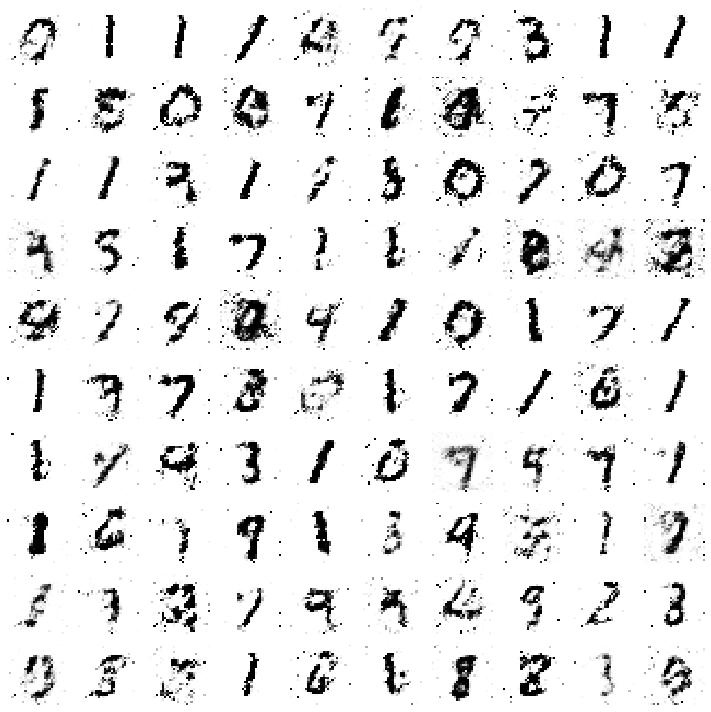

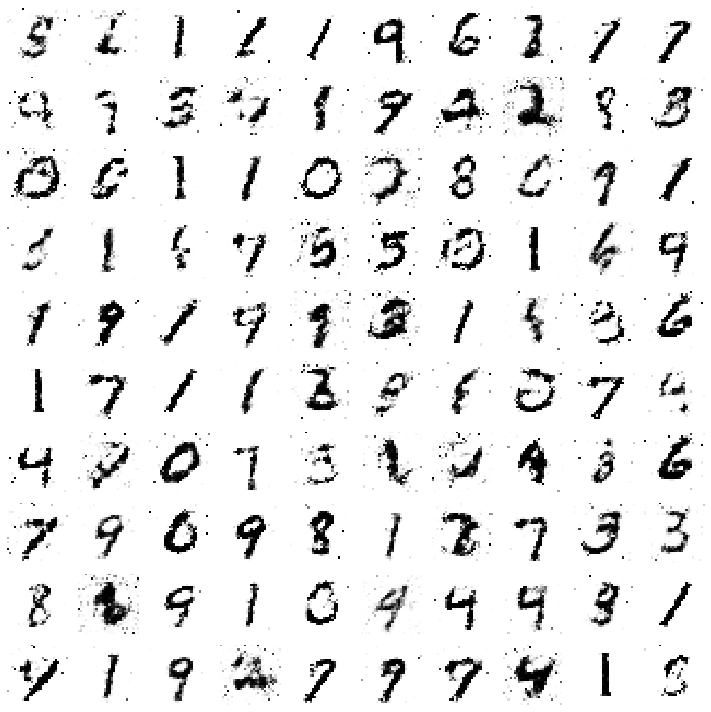

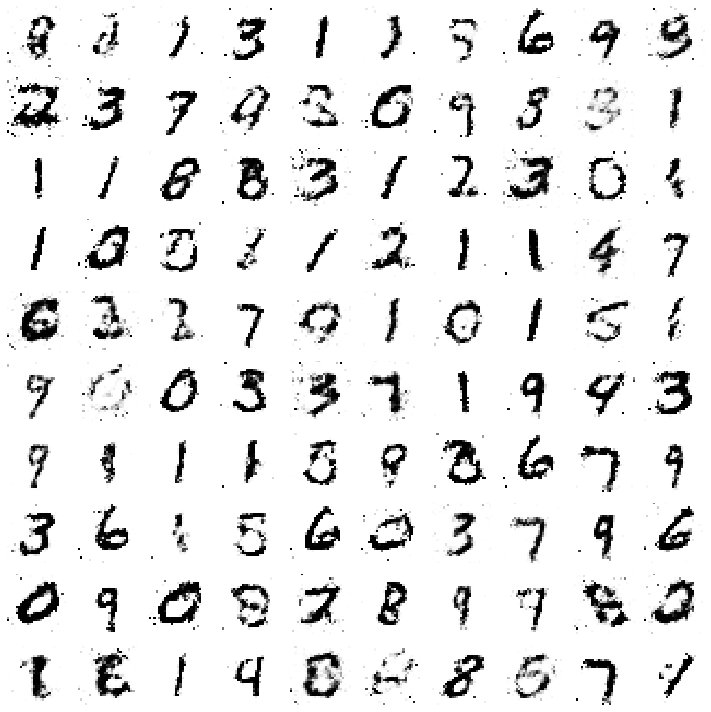

In [125]:

if __name__ == '__main__':
    train(20, 128)